In [80]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim.models import CoherenceModel

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# load all metadata

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gorka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gorka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gorka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gorka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [81]:
#Cargamos los datos
#Cogemos las 100 primeras descripciones como prueba
data = pd.read_csv('justice.csv')
x_train = data['facts']
y_train1 = data['first_party_winner']
y_train2 = data['issue_area']

In [82]:
#Elimina signos de puntuacion y todo a minusculas
def sent_to_words(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(x_train))

In [83]:
#Eliminamos las stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words_nostops = remove_stopwords(data_words)

In [84]:
lem = WordNetLemmatizer()
ps = PorterStemmer()

In [85]:
#Lematizamos
def lemmatization(texts):
    texts_out = []
    for text in texts:
        lemText = []
        for sent in text:
            stemmed = ps.stem(sent)
            lemText.append(lem.lemmatize(stemmed))
        texts_out.append(lemText)
    return texts_out

data_lemmatized = lemmatization(data_words_nostops)

In [86]:
#Vectorizar
#Topic modeling
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
#lda = LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, update_every=1, chunksize=100, passes=20, alpha='auto',per_word_topics=True)
#print(f"TOPICOS --> {lda.print_topics()}")

lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, passes=50, eval_every=None)
count = 0
for i in lda_model.print_topics():
    print("Topic:", count, i)
    count += 1


Topic: 0 (0, '0.123*"properti" + 0.110*"tax" + 0.056*"bank" + 0.048*"purchas" + 0.036*"market" + 0.030*"ga" + 0.027*"credit" + 0.026*"stock" + 0.018*"revenu" + 0.018*"paid"')
Topic: 1 (1, '0.234*"sentenc" + 0.089*"death" + 0.079*"convict" + 0.072*"juri" + 0.048*"murder" + 0.045*"penalti" + 0.042*"crime" + 0.038*"guilti" + 0.036*"robberi" + 0.026*"home"')
Topic: 2 (2, '0.029*"charg" + 0.021*"drug" + 0.019*"convict" + 0.018*"violat" + 0.017*"jame" + 0.017*"evid" + 0.016*"inform" + 0.016*"offens" + 0.015*"juri" + 0.015*"product"')
Topic: 3 (3, '0.112*"board" + 0.081*"agreement" + 0.075*"union" + 0.070*"collect" + 0.044*"although" + 0.037*"good" + 0.033*"ongo" + 0.028*"recogn" + 0.024*"contract" + 0.024*"exclus"')
Topic: 4 (4, '0.123*"patent" + 0.113*"citi" + 0.090*"child" + 0.027*"social" + 0.027*"licens" + 0.022*"never" + 0.022*"parent" + 0.021*"mother" + 0.019*"commission" + 0.018*"father"')
Topic: 5 (5, '0.186*"offic" + 0.070*"polic" + 0.051*"search" + 0.044*"arrest" + 0.035*"posse" + 

In [87]:
#Hay que cambiar el n_topics por el numero de topics del LDA
n_topics = 20
vectorized = []
count = 0

for i in lda_model[corpus]:
    index = [0]*n_topics
    for n in i:
        index[n[0]] = n[1]
    vectorized.append(index)
vectorized = pd.DataFrame(vectorized)
print(vectorized)

            0         1         2         3         4         5         6   \
0     0.000000  0.000000  0.104623  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.510941  0.000000  0.000000   
2     0.000000  0.000000  0.116810  0.000000  0.000000  0.072692  0.000000   
3     0.000000  0.105190  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.190338  0.000000  0.040374  0.044517  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
3298  0.000000  0.026558  0.076914  0.000000  0.000000  0.041060  0.000000   
3299  0.000000  0.179287  0.134083  0.000000  0.017713  0.037533  0.000000   
3300  0.000000  0.000000  0.183268  0.000000  0.000000  0.203668  0.012209   
3301  0.000000  0.000000  0.000000  0.092763  0.000000  0.000000  0.000000   
3302  0.062723  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            7         8         9         10        11        1

In [88]:
from sklearn.decomposition import  PCA

print("Before:", vectorized.shape)
# = PCA(n_components='mle', svd_solver='full')
pca = PCA(n_components=2)
pca.fit(vectorized)
labels_PCA= pca.transform(vectorized)
print("After:", labels_PCA.shape)

Before: (3303, 20)
After: (3303, 2)


In [91]:
from  sklearn.cluster import  KMeans

kmeans = KMeans(10)
kmeans.fit(labels_PCA)
kmeans_labels = kmeans.predict(labels_PCA)

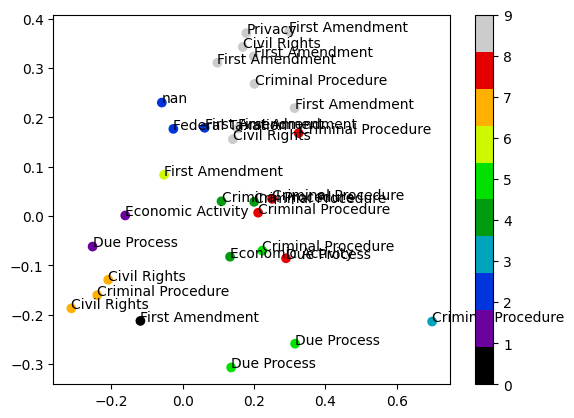

In [93]:
import matplotlib.pyplot as plt
samples = 30
# Dibujar los puntos en el espacio, color: cluster, etiqueta-numérica: clase
# Color del punto: cluster
sc = plt.scatter(labels_PCA[:samples,0],labels_PCA[:samples,1], cmap=plt.cm.get_cmap('nipy_spectral', 10),c=kmeans_labels[:samples])
plt.colorbar()
# Etiqueta numérica: clase
for i in range(samples):
    plt.text(labels_PCA[i,0],labels_PCA[i,1], y_train2[i])